In [15]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data = loadmat('data/ex7data2.mat')

In [17]:
data_tmp = data['X']
x = data_tmp[:,0:1]
y = data_tmp[:,1:]

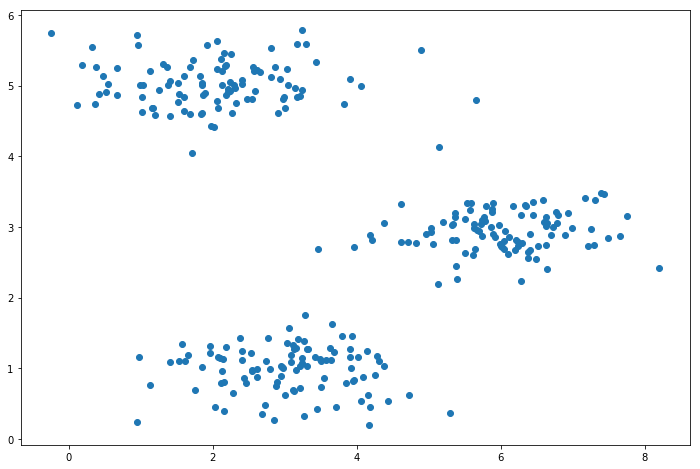

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(x, y)

In [19]:
no_centroids = 3

So here instead of randomly initializing the centroids, we'll select it from the data given.

In [49]:
cent_x = np.random.choice(a=x.ravel(), size=(no_centroids,1))
cent_y = np.random.choice(a=y.ravel(), size=(no_centroids,1))
cent = np.concatenate((cent_x, cent_y), axis = 1)

In [50]:
cent

array([[ 5.52908677,  1.02232644],
       [ 2.84734459,  0.32056676],
       [ 4.43152976,  3.14799183]])

In [51]:
belong = np.zeros(len(x))

In [9]:
iter = 10
for j in range(1,iter):
    belong = (np.square(x - cent[:,0]) + np.square(y- cent[:,1])).argmin(axis = 1)
    for i in range(0, no_centroids):
        cent[i,0] = x[belong == i].mean()
        cent[i,1] = y[belong == i].mean()

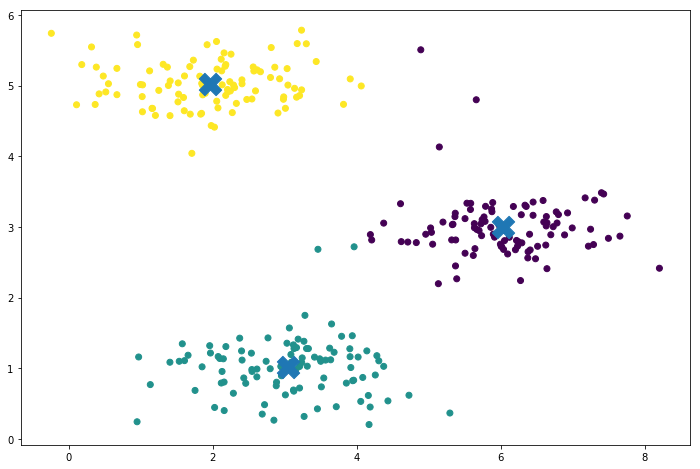

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(x, y, c=belong.reshape((300,1)))
plt.scatter(cent[:,0], cent[:,1], marker='X', s=500)

In Above Example we are selecting no of centroids based on our visual analysis of the scatter plot, but if there are multiple features we will be unable to plot it. Hence it will be impossible to find no of the centroid, therefore, we will use elbow rule to find appropriate no of centroids.

In [11]:
max_cent = 10
distance = np.zeros(max_cent)
for no_centroids in range(1,max_cent):
    cent_x = np.random.choice(a=x.ravel(), size=(no_centroids,1))
    cent_y = np.random.choice(a=y.ravel(), size=(no_centroids,1))
    cent = np.concatenate((cent_x, cent_y), axis = 1)
    belong = np.zeros(len(x))
    iter = 10
    for j in range(1,iter):
        belong = (np.square(x - cent[:,0]) + np.square(y- cent[:,1])).argmin(axis = 1)
        for i in range(0, no_centroids):
            cent[i,0] = x[belong == i].mean()
            cent[i,1] = y[belong == i].mean()
    distance[no_centroids] = (np.square(x - cent[:,0]) + np.square(y- cent[:,1])).min(axis = 1).sum()

In [12]:
distance[0]=5000

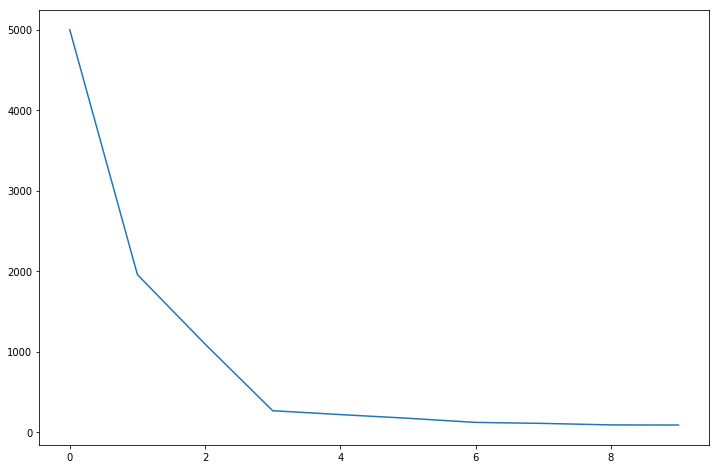

In [13]:
plt.figure(figsize=(12,8))
plt.plot(distance)

In [14]:
distance

array([ 5000.        ,  1957.65472063,  1094.83856993,   266.65851965,
         218.36620002,   172.62234138,   121.16907283,   108.76402   ,
          90.09296932,    88.55922065])

Here we can see no of centroids 3 is a good choice